Zadaniem jest określenie typów wina na podstawie poniższego zbioru danych:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
- Przeprowadź krótką wstępną analizę danych
- Stwórz funkcję budującą model (DNN)
- Przeprowadź trening i walidację wyników
- Na podstawie historii treningu przedstaw zmianę funkcji loss
- Sprawdź jak zmiana parametrów i architektury Twojej sieci wpływa na wyniki i przedstaw swoje obserwacje

In [1]:
# import potrzebnych bibliotek
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### Wstępna analiza danych

In [3]:
# przerzucenie danych do ramki dataframe

wine_data = pd.DataFrame(data.data)
wine_data.columns = data.feature_names
wine_data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# poniżej widać, że dataset jest czysty i nie zawiera nulli, więc nie będzie konieczna inputacja danych

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
# korelacja pomiędzy cechami

correlation_matrix = wine_data.corr()
correlation_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

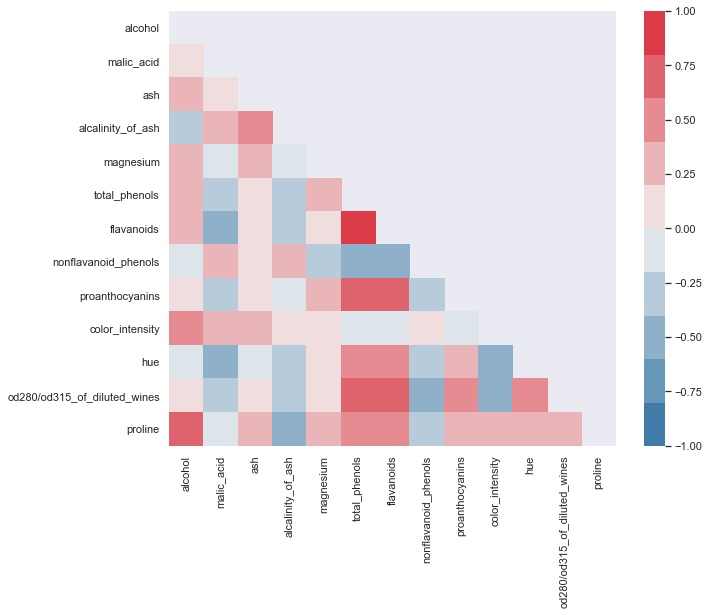

In [6]:
# graficzne przedstawienie korelacji

sns.set(rc={'figure.figsize':(10,8)})
color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(correlation_matrix), k=0)
sns.heatmap(correlation_matrix, mask = mask, cmap=color_map, vmin=-1., vmax=1.)

In [7]:
x = data.data.astype(np.float32)
y = data.target.astype(np.float32)

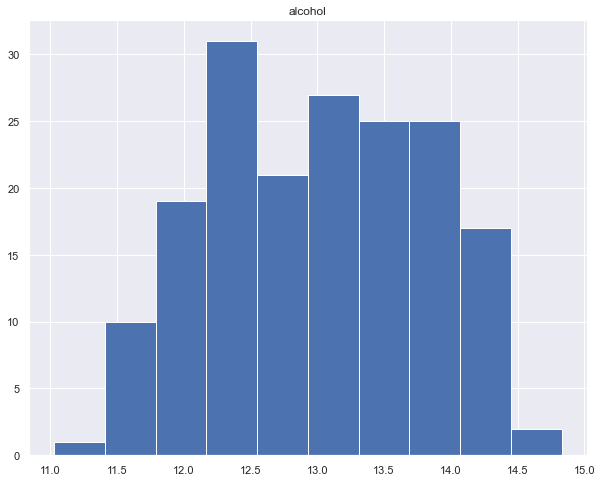

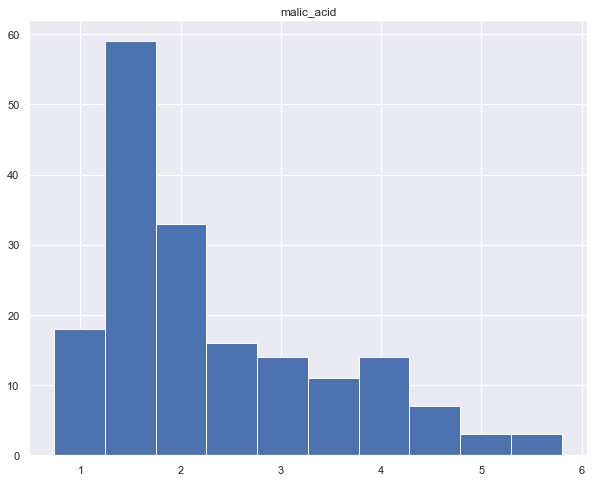

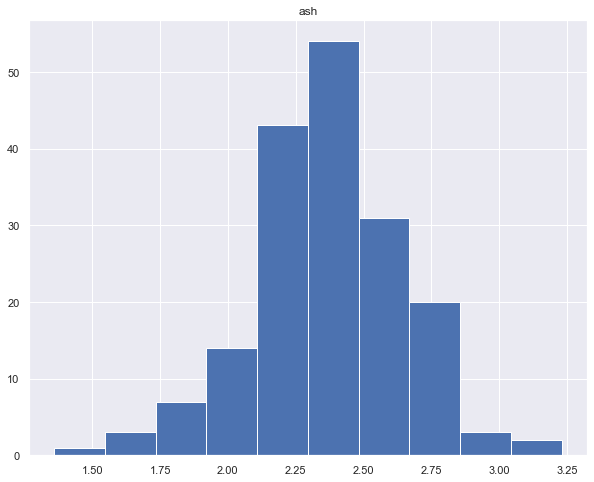

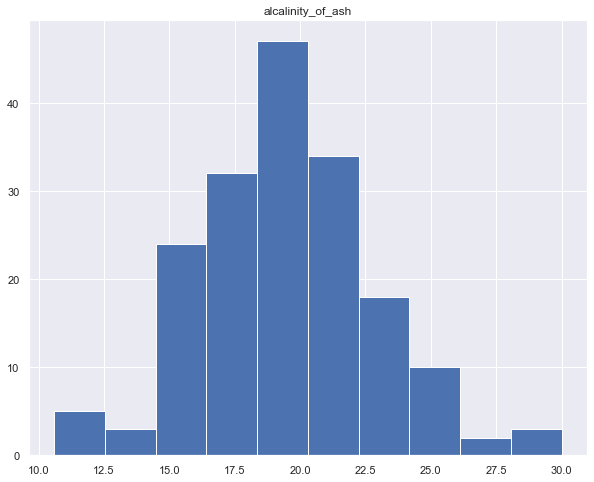

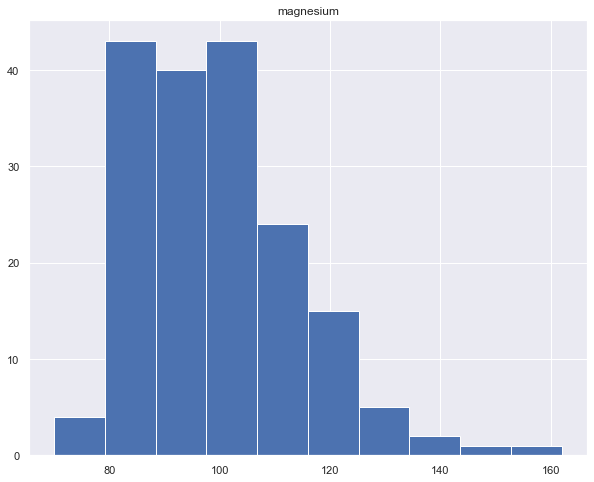

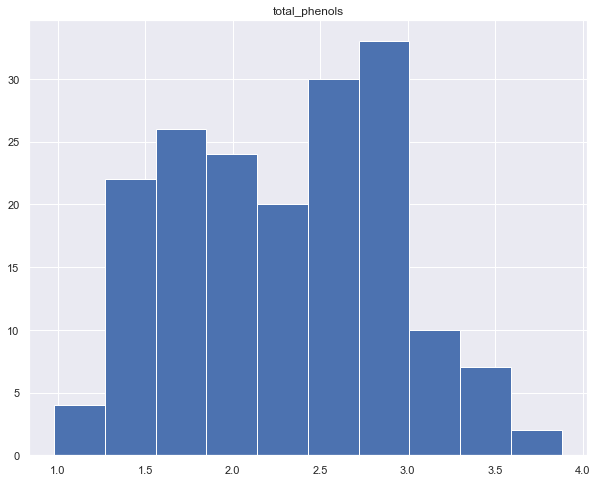

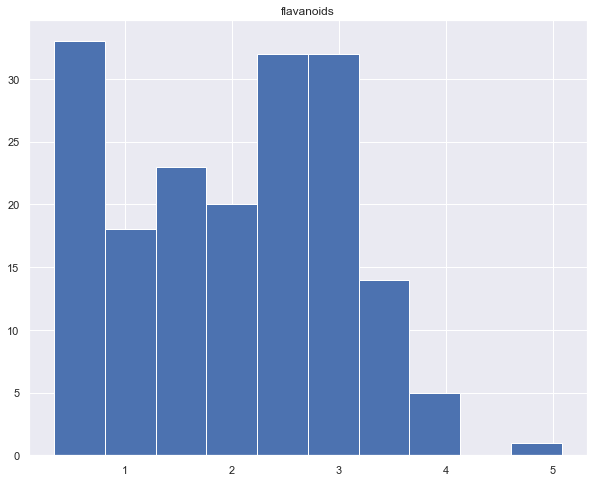

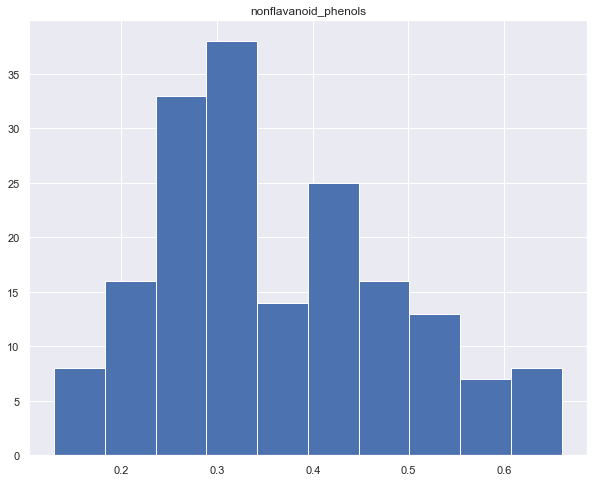

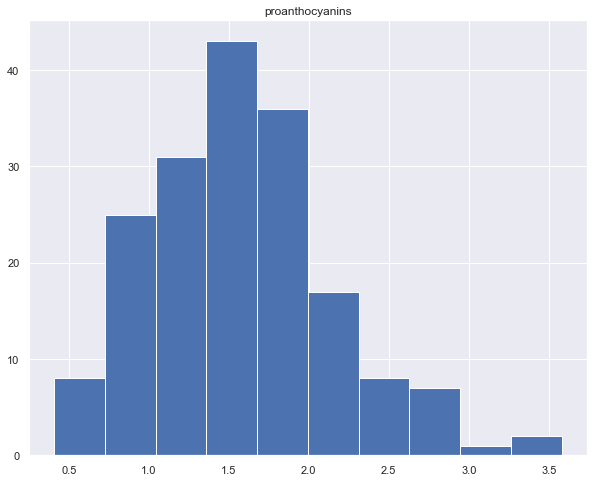

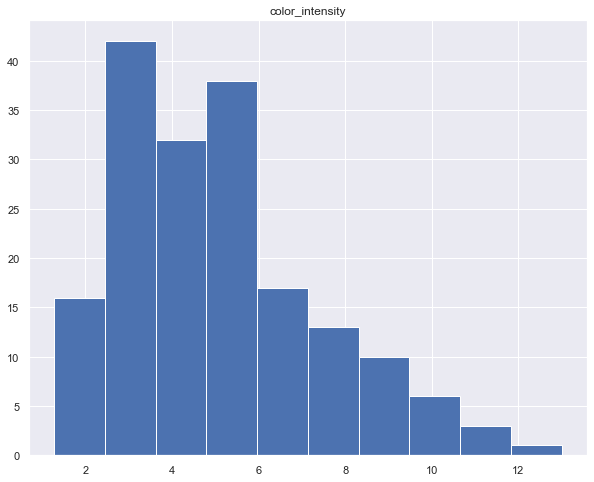

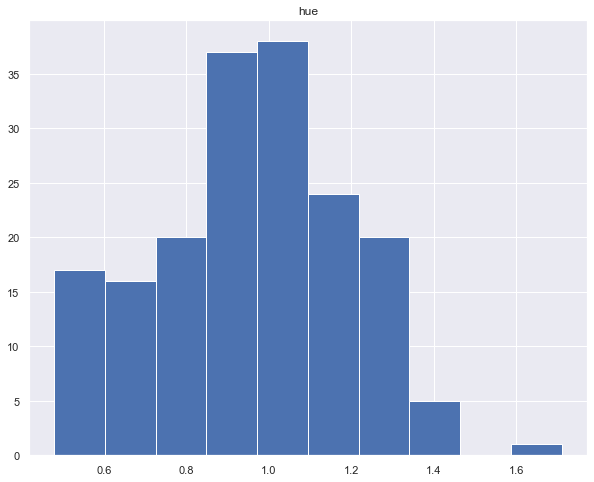

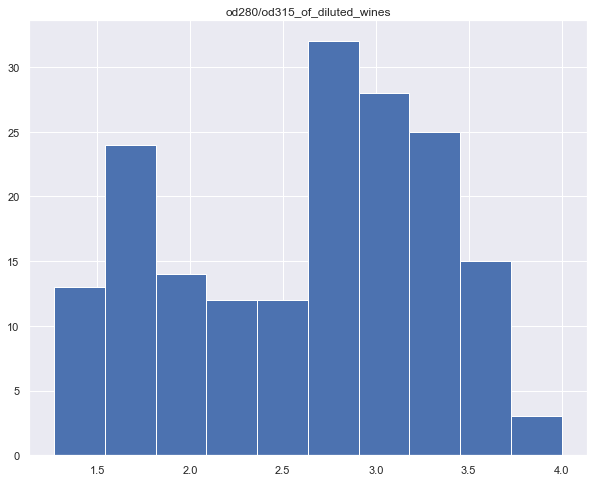

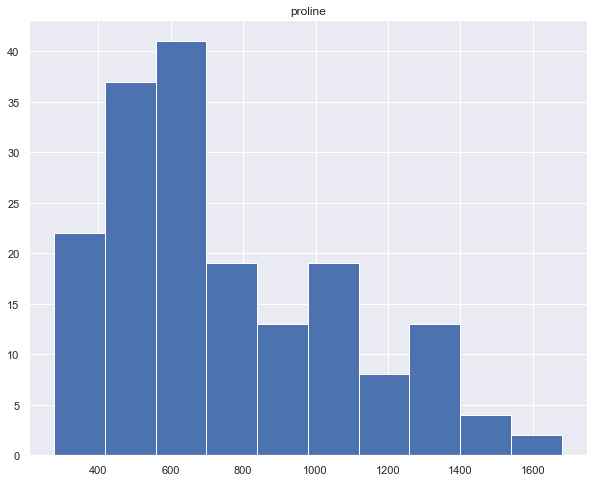

In [8]:
# graficzne przedstawienie rozkładu cech

for i in wine_data.columns:
    plt.hist(wine_data[i])
    plt.title(i)
    plt.show()

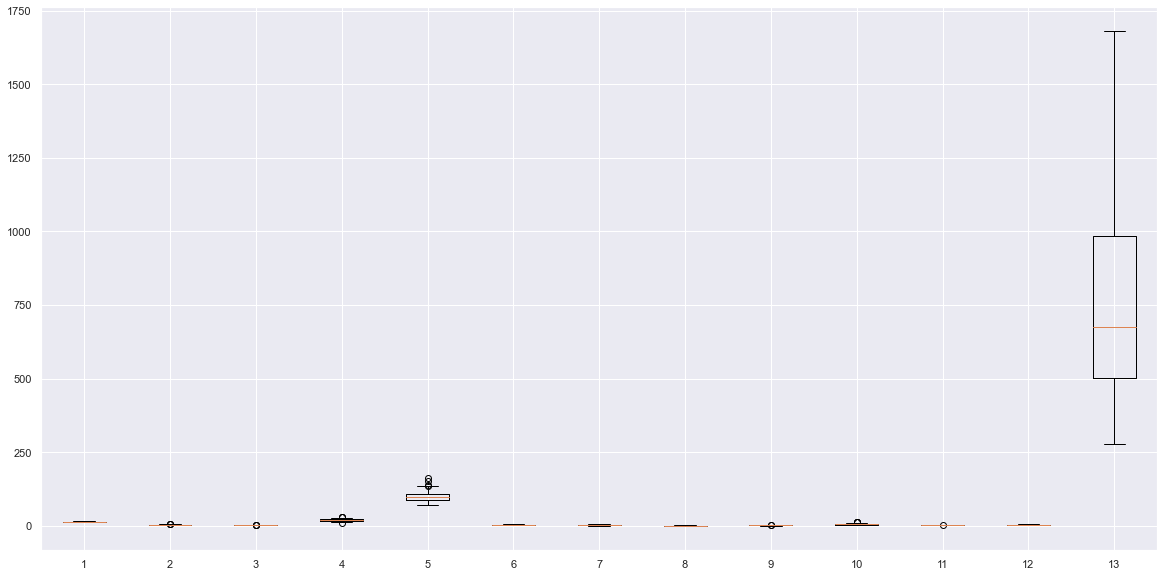

In [9]:
# graficzne przedstawienie cech na boxplotach

fig = plt.figure(figsize=(20,10))
plt.boxplot(x)
plt.show()

In [10]:
# Widać, że cechy przyjmują wartości w różnych zakresach, więc warto zrobić normalizację danych:

x = MinMaxScaler().fit_transform(x)

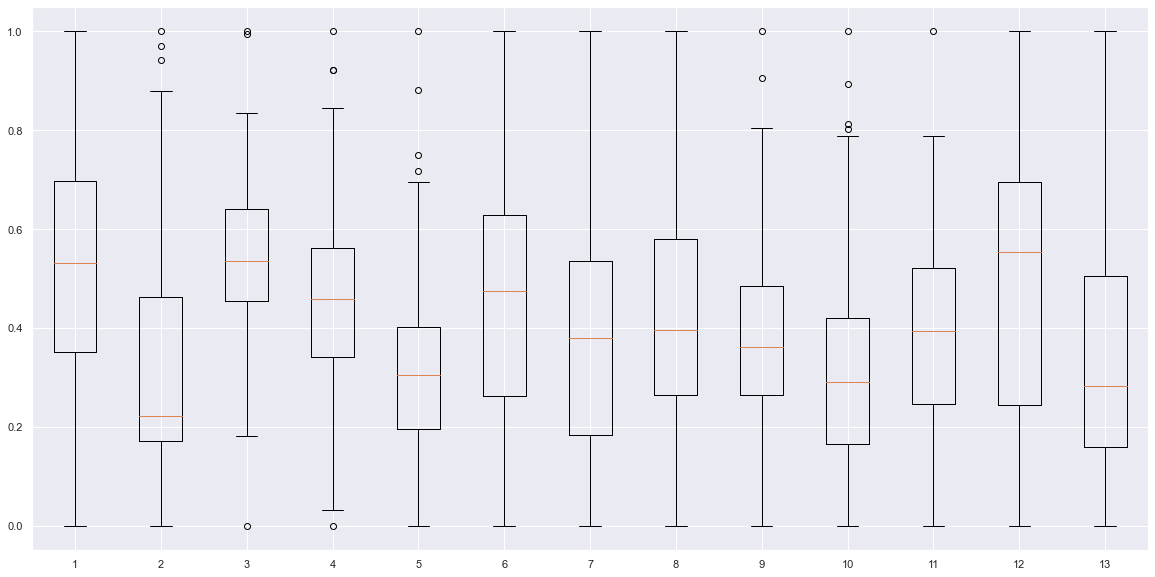

In [11]:
# graficzna prezentacja boxplot już po normalizacji:
    
fig = plt.figure(figsize=(20,10))
plt.boxplot(x)
plt.show()

In [12]:
# zmienna odpowiedzi posiada wartości kategoryczne, więc musimy zamienić ją na tablicę zer i jedynek

y = y.reshape(-1, 1)

y = OneHotEncoder(sparse=False).fit_transform(y)

In [13]:
# dzielimy zbiór na treningowy i testowy

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Funkcja budująca model

In [14]:
def modelDNN(hNum, num_input, num_output, act, loss, opt):
    """
    num_input - liczba wejść
    hNum - lista warstw ukrytych
    num_output - listw wyjść
    act - funkcja aktywacji
    loss - fukcja kosztu
    opt - optymalizator
    """
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=num_input, name="wejscie"))
    
    for layer in hNum:
        model.add(layers.Dense(layer, activation=act))
    
    model.add(layers.Dense(num_output, name="wyjscie", activation='softmax'))
    print(model.summary())
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    
    return model

In [15]:
# dobór parametrów do modelu:

num_input = x.shape[1]
num_output = y.shape[1]
hNum = [16, 32]
act = tf.nn.relu
loss=tf.keras.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
new_model = modelDNN(hNum, num_input, num_output, act, loss, opt)

results = new_model.fit(x_train, y_train, batch_size=20, epochs=75, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 wyjscie (Dense)             (None, 3)                 99        
                                                                 
Total params: 867
Trainable params: 867
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
8/8 [==============================] - 1s 2ms/step - loss: 1.0646 - accuracy: 0.5845
Epoch 2/75
8/8 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.6549
Epoch 3/75
8/8 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.6479
Epoch 4/75
8/8 [=============

In [16]:
# Prezentacja na zbiorze 25 próbek z testu
y_pred = tf.nn.softmax(new_model.predict(x_test[:25])).numpy().argmax(axis=1)

print(f"Predykcja modelu:\n{y_pred}")
print(f"Referencja:\n{y_test[:25].argmax(axis=1)}")

# Wyniki na zbiorze treningowym
print("\nRaport klasyfikacji na zbiorze treningowym")
y_pred = tf.nn.softmax(new_model.predict(x_train)).numpy().argmax(axis=1)
print(classification_report(y_train.argmax(axis=1), y_pred))

# Wyniki na całości
print("\nRaport klasyfikacji na zbiorze testowym")
y_pred = tf.nn.softmax(new_model.predict(x_test)).numpy().argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred))

Predykcja modelu:
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2]
Referencja:
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2]

Raport klasyfikacji na zbiorze treningowym
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      0.98      0.98        57
           2       0.98      1.00      0.99        40

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142


Raport klasyfikacji na zbiorze testowym
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



#### Zmiana funkcji Loss

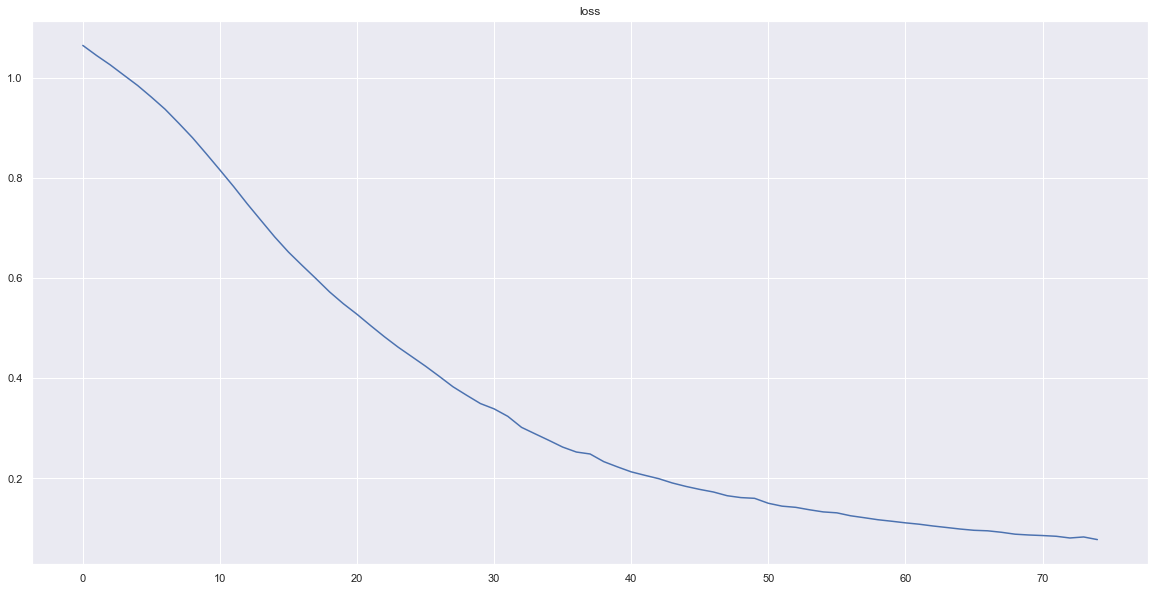

In [17]:
fig = plt.figure(figsize=(20,10))
plt.plot(results.history["loss"])
plt.title("loss")
plt.show()

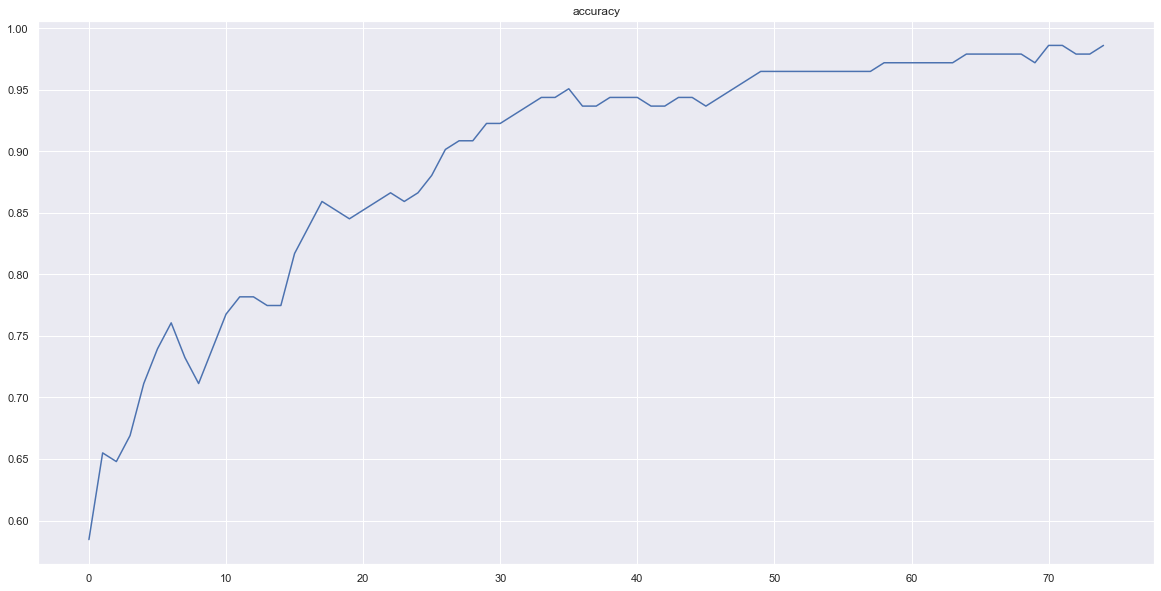

In [18]:
# Funcka loss zachowuje się zgodnie z oczekiwaniami i spada wraze ze wzrostem epok
# Poniżej jeszcze prezentacja accuracy modelu:

fig=plt.figure(figsize=(20,10))
plt.plot(results.history['accuracy'])
plt.title("accuracy")
plt.show()

#### Wnioski końcowe oraz manipulacja parametrami modelu

Już w pierwszym modelu new_model udało się uzyskać bardzo dobre wyniki. Gdyby nie fakt, że dataset jest bardzo mało, można by podejrzewać ten model o overfitting. W tym przypadku nie ma sensu już tych wyników poprawiać, więc w dalszej części spróbuję tak zmanipulować danymi, aby ten model lekko popsuć. Na przykład - zmniejszę liczbę warstw ukrytych do jednej, zmniejszę liczbę epok, zmniejszę batch_size.

In [19]:
# drugi model - redukcja warstw ukrytych w stosunku do bazwoego new_model

num_input = x.shape[1]
num_output = y.shape[1]
hNum = [32]
act = tf.nn.relu
loss=tf.keras.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
ii_model = modelDNN(hNum, num_input, num_output, act, loss, opt)

results = ii_model.fit(x_train, y_train, batch_size=20, epochs=75, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                448       
                                                                 
 wyjscie (Dense)             (None, 3)                 99        
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
8/8 [==============================] - 0s 1ms/step - loss: 1.1923 - accuracy: 0.2746
Epoch 2/75
8/8 [==============================] - 0s 2ms/step - loss: 1.1417 - accuracy: 0.3028
Epoch 3/75
8/8 [==============================] - 0s 2ms/step - loss: 1.1026 - accuracy: 0.3873
Epoch 4/75
8/8 [==============================] - 0s 2ms/step - loss: 1.0660 - accuracy: 0.4859
Epoch 5/75
8/8 [==============================] - 0s 2ms/step -

In [20]:
# Wyniki na zbiorze treningowym
print("\nRaport klasyfikacji na zbiorze treningowym")
y_pred = tf.nn.softmax(ii_model.predict(x_train)).numpy().argmax(axis=1)
print(classification_report(y_train.argmax(axis=1), y_pred))

# Wyniki na całości
print("\nRaport klasyfikacji na zbiorze testowym")
y_pred = tf.nn.softmax(ii_model.predict(x_test)).numpy().argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred))


Raport klasyfikacji na zbiorze treningowym
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.97      0.98      0.97        57
           2       0.98      1.00      0.99        40

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142


Raport klasyfikacji na zbiorze testowym
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [21]:
# Zmniejsze wartwy ukrytej do zaledwie jednej - nieznacznie pogorszyło wyniki modelu

In [22]:
# trzeci model - zmniejszona wartość epok w stosunku do modelu bazowego new_model

num_input = x.shape[1]
num_output = y.shape[1]
hNum = [16, 32]
act = tf.nn.relu
loss=tf.keras.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
i3_model = modelDNN(hNum, num_input, num_output, act, loss, opt)

results = i3_model.fit(x_train, y_train, batch_size=20, epochs=50, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 wyjscie (Dense)             (None, 3)                 99        
                                                                 
Total params: 867
Trainable params: 867
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1089 - accuracy: 0.4014
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0713 - accuracy: 0.4014
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0433 - accuracy: 0.5070
Epoch 4/50
8/8 [===========

In [23]:
# Wyniki na zbiorze treningowym
print("\nRaport klasyfikacji na zbiorze treningowym")
y_pred = tf.nn.softmax(i3_model.predict(x_train)).numpy().argmax(axis=1)
print(classification_report(y_train.argmax(axis=1), y_pred))

# Wyniki na całości
print("\nRaport klasyfikacji na zbiorze testowym")
y_pred = tf.nn.softmax(i3_model.predict(x_test)).numpy().argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred))


Raport klasyfikacji na zbiorze treningowym
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.96      0.95      0.96        57
           2       0.95      1.00      0.98        40

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142


Raport klasyfikacji na zbiorze testowym
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [24]:
# Zmniejszenie epok do 50 - nieznacznie pogorszyło wyniki modelu. Widać, że na tak małym zbiorze model szybko się uczy
# i po wynikach widać, że dość szybko osiąga dość dobre wyniki - accuracy jest na poziomie 95% powyżej 30 epoki. 
# Tak więc, aby zmniejszenie epok dość znacznie wpłynęło na wyniki modelu, musiałoby być na poziomie niższym niż 10.

In [25]:
# czwarty model - zmniejszona wartość batch_size w stosunku do modelu bazowego new_model

num_input = x.shape[1]
num_output = y.shape[1]
hNum = [16, 32]
act = tf.nn.relu
loss=tf.keras.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
i4_model = modelDNN(hNum, num_input, num_output, act, loss, opt)

results = i4_model.fit(x_train, y_train, batch_size=8, epochs=75, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                224       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 wyjscie (Dense)             (None, 3)                 99        
                                                                 
Total params: 867
Trainable params: 867
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
18/18 [==============================] - 0s 2ms/step - loss: 1.0752 - accuracy: 0.5000
Epoch 2/75
18/18 [==============================] - 0s 2ms/step - loss: 1.0121 - accuracy: 0.8380
Epoch 3/75
18/18 [==============================] - 0s 2ms/step - loss: 0.9535 - accuracy: 0.8732
Epoch 4/75
18/18 [===

18/18 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 1.0000


In [26]:
# Wyniki na zbiorze treningowym
print("\nRaport klasyfikacji na zbiorze treningowym")
y_pred = tf.nn.softmax(i4_model.predict(x_train)).numpy().argmax(axis=1)
print(classification_report(y_train.argmax(axis=1), y_pred))

# Wyniki na całości
print("\nRaport klasyfikacji na zbiorze testowym")
y_pred = tf.nn.softmax(i4_model.predict(x_test)).numpy().argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred))


Raport klasyfikacji na zbiorze treningowym
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        40

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Raport klasyfikacji na zbiorze testowym
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [27]:
# Zmniejszenie parametru batch_size wpłynęło na uzyskanie jeszcze lepszych wyników przez model - w porównaniu do bazowego
# new_model. W tym momencie wyniki są idealne, co już ewidentnie "pachnie" przueczeniem modelu.